# CLASSIFICATION Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**TEAM CBB3**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: EDSA - Climate Change Belief Analysis 2022

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

### Problem Statement

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

### Data overview
Data The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:

Class Description
* 2 News: the tweet links to factual news about climate change
* 1 Pro: the tweet supports the belief of man-made climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate change

Variable definitions
- sentiment: Sentiment of tweet
- message: Tweet body
- tweetid: Twitter unique id

# Team Supervisor
- Chris Barnett

# TEAM CBB3 MEMBERS
- 1. Elelwani Tshikovhi (Team Leader);
- 2. Katlego Maponya (Team coordinator) ;
- 3. Musa Mashaba ;
- 4. Zwothandwa Kunene ;
- 5. Sinethemba Nongqoto;
- 6. Desree Maleka


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Cleaning</a>

<a href=#five>5. Modelling</a>

<a href=#seven>6. Model Evaluation and Perfomance</a>

<a href=#seven>7. Generating files</a>

<a href=#seven>8. Conclusion</a>


<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
|  |

---

In [1]:
#%pip install gensim
#conda install -c conda-forge wordcloud
#%pip install demoji

In [2]:
#%pip install imbalanced-learn

# Import all the  **libraries**

In [1]:
# Data analysis and wrangling libraries
import pandas as pd
import numpy as np
# Visualisations
import seaborn as sns
import matplotlib.pyplot as plt
# Preprocessing
import string
import re
import nltk
from nltk.corpus import stopwords
import time
import collections
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
# Modelling
from tqdm import tqdm
#rom gensim.models.doc2vec import LabeledSentence 
import gensim
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,ComplementNB,BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.linear_model import RidgeClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from sklearn import metrics
from sklearn.metrics import f1_score
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from collections import defaultdict, Counter
from nltk.tokenize import TweetTokenizer
from scipy import stats 
# Metrics for Model Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
# Warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Downloads
nltk.download(['punkt','stopwords'])
%matplotlib inline
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\f5468981\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\f5468981\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Download NLTK Corpora
Some of the `nltk` text processing methods introduced in this train involve a lookup operation. For example, to find all [stopwords](https://www.geeksforgeeks.org/removing-stop-words-nltk-python/) in a given string of text, we require a list of all possible stopwords in the English language to use for the lookup. Such a list is refered to as a [corpus](https://en.wikipedia.org/wiki/Text_corpus). Therefore, we need to first download the corpora we're going use, otherwise we may get a lookup error! Watch out specifically for the `tokenize` and `stopwords` sections. Not to worry, as we can easily avoid these errors by downloading the [corpora](http://www.nltk.org/nltk_data/) using the `nltk` downloader tool:

In [2]:
stopwords_list = stopwords.words('english')
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

pip install comet version control

In [ ]:
%pip3 install comet_ml

UsageError: Line magic function `%pip3` not found.


**Comet** provides a central place for my team to track their ML experiments and models so we can seamlessly compare and share experiments, debug and stop underperforming models

In [3]:
# Import comet_ml at the top 
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="rI7gAvhuv8lNvQcjSox3TjwIF",
    project_name="team-cbb-3-classification",#project name on comet
    workspace="elelwani-tshikovhi",
)

# Run your code and go to /

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: keras, xgboost, tensorflow, tensorboard, sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/elelwani-tshikovhi/team-cbb-3-classification/2643bdcbdd85440fbaf5432decfcbc5d



*   [Trello Link](https://trello.com/b/2KvEPRJi/advanced-classificatin-team-cbb3-week-1)
*   [Link to comet](https://www.comet.ml/elelwani-tshikovhi/team-cbb-3-classification/view/new/panels)
*   [Link to Github](https://github.com/TEAMCBB3Classificationpredict)
*   [Link to streamlit]( http://34.244.129.101:5000)
*   [link to presentation](https://docs.google.com/presentation/d/19E1pbrp_lXfBG3FyOsz43QQRqq-qd7eGtp00w7nESCs/edit#slide=id.p)

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |

---

The training and testing data respectively are loaded as Pandas DataFrames

In [4]:
# Load train data
train = pd.read_csv('https://raw.githubusercontent.com/TEAMCBB3Classificationpredict/datasets/main/train.csv')

# Load test data
test = pd.read_csv('https://raw.githubusercontent.com/TEAMCBB3Classificationpredict/datasets/main/test_with_no_labels.csv')

In [5]:
#To view the first 10 row of the data to see how it looks like
train.head(10)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
5,1,Worth a read whether you do or don't believe i...,425577
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933
7,1,RT @makeandmendlife: Six big things we can ALL...,992717
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510
9,1,RT @paigetweedy: no offense… but like… how do ...,260471


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
|This phase is important. This will help to understand patterns in the data, pinpoint any outliers and indicate relationships between variables uusing  descriptive statistics and data visualisations

---


### Shape of Dataframe

In [ ]:
#getting the shape of the dataframes
print('Train shape : rows, columns:',train.shape)
print('test shape : rows, columns:',test.shape)

Train shape : rows, columns: (15819, 3)
test shape : rows, columns: (10546, 2)


The **train** has `15819 rows and 3 columns!` while **test data** has `10546 rows and  just 2 columns!`

In [ ]:
#cheking the full information of rows ans columns and data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


Train data has 2 numerical culumns and 1 categorical column

### Check for nulls

In [ ]:
train.isnull().sum() #checking for null values

sentiment    0
message      0
tweetid      0
dtype: int64

NO empty cells or values 

In [ ]:
# Create class distribution dataframe
sentiment_counts = train.groupby('sentiment').size().reset_index(name='counts')
sentiment_counts


,sentiment,counts
0,-1,1296
1,0,2353
2,1,8530
3,2,3640


Most occuring sentiment is 1 and least occuring setiment is -1 which means there is a high percentage of tweet that are for climate change than anti climate change.|
The bar graph below clearly indicate that sentient 1 has the highest number of poeple tweets believing in climate change.The sentiments classes are imbalanced this is to be corrected later  

### Histogram and density plot

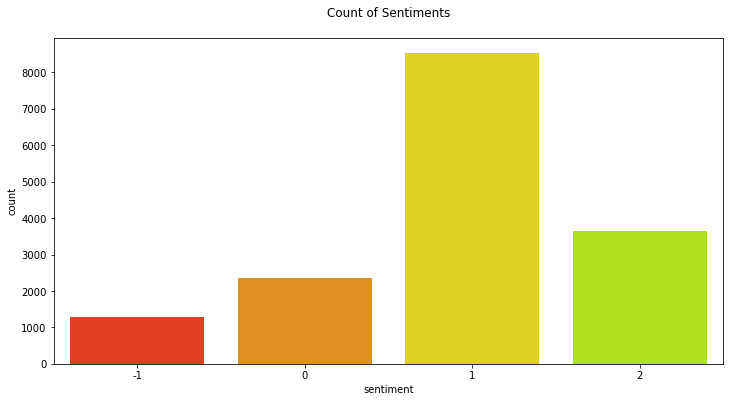

In [ ]:
#bar graph to show the semtiments 
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=train, palette="prism")
plt.title('Count of Sentiments\n')
plt.show()

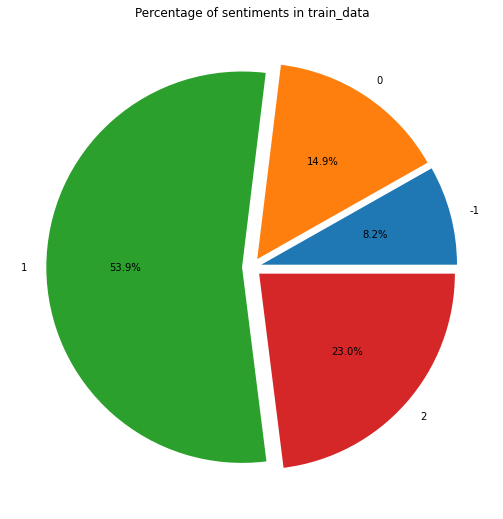

In [ ]:
#pie chart to show the sentiment percentages 
senti = train.groupby('sentiment', as_index=False).count()
fig = plt.subplots(figsize=(14,9))
plt.pie(senti['message'], labels = senti['sentiment'].astype('str'), autopct='%1.1f%%', explode = [0.05, 0.05, 0.05, 0.05])
plt.title('Percentage of sentiments in train_data')
plt.show()

More than 50% of the data consist of pro climate change  tweets which makes the data highly imbalanced and  would need to be balance at the later stage in modelling 

In [ ]:
df_train = train.copy() #Making a copy so changes doesnt affect original data

<Figure size 1440x1080 with 0 Axes>

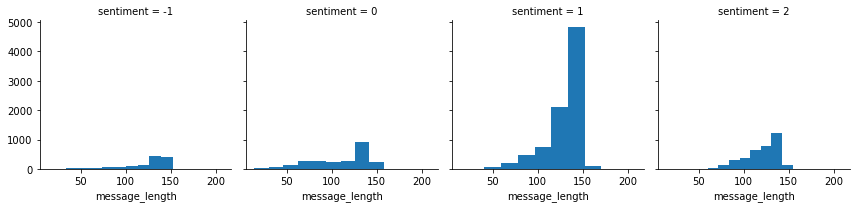

In [ ]:
#Plot the distribution of the tweet length per csentiment using a histogram.
plt.figure(figsize=(20,15))
df_train['message_length'] = df_train['message'].apply(len)
g = sns.FacetGrid(df_train,col='sentiment')
g.map(plt.hist,'message_length') 
plt.show()

Sentiment 1 has the highest distribution of long message length highly concentrated between 110-150 and sentiment -1 has the least distribution of message length.
Since the data aint normalise the sentiment 1 will have the highest distribution
- TWEET CHARACTER LIMIT	280 CHARACTERS currently but i think this tweets are from the time when tweet character limit was 180 characters

Plot Of Top 15 message Of Tweet

c:\Users\f5468981\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\f5468981\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\f5468981\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0, flags=flags)


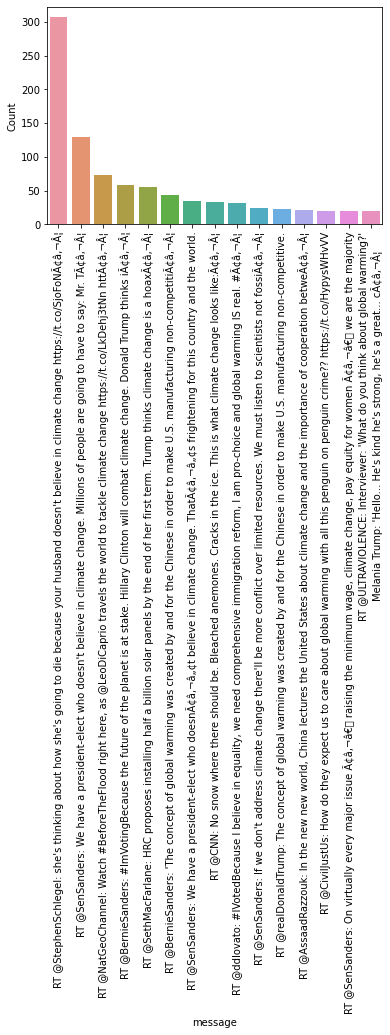

In [ ]:
loc_df = df_train['message'].value_counts().reset_index().rename(columns={'index':'message','message':'Count'}).sort_values('Count',ascending=False).head(15)
sns.barplot(loc_df['message'],loc_df['Count'])
plt.xticks(rotation = 90)
plt.show()

most retweeted message /tweet are shown above which consist the top 15 most appearing messages 

#  BOX PLOT 

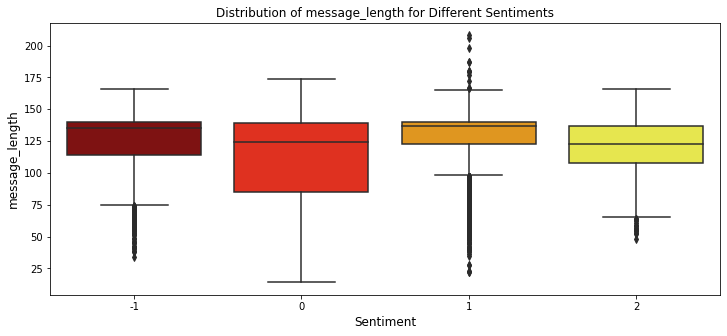

In [ ]:
#box plot to show the distribution of message length per sentiment
fig,axis = plt.subplots(figsize=(12,5)) 
sns.boxplot(x='sentiment',y='message_length',data=df_train,palette=("hot")) 
plt.title('Distribution of message_length for Different Sentiments', fontsize = 12) 
plt.xlabel('Sentiment', fontsize = 12) 
plt.ylabel('message_length', fontsize = 12) 
plt.show()

# Insights
### sentiments -1,1 and 2 have outliers 
- sentiment 1 has a lot of unsual short and long message length which can be seen as outliers 
- sentiment 0 messages length is perfectly skewed to the left   with  no outliers
- sentiment -1,0,1 are skewed tothe left and 2 is not 

<AxesSubplot:>

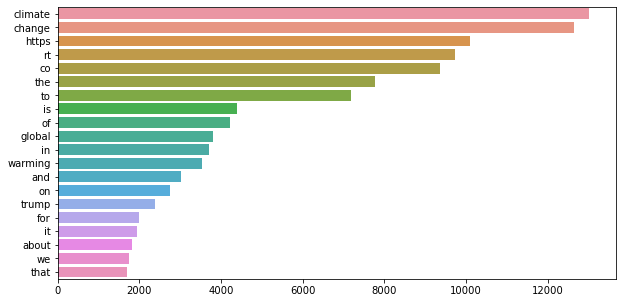

In [ ]:
# Visualize current state of data
# Function returns a unigram
def top_tweet_unigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range = (1, 1)).fit(corpus)
    bag_of_words = vec.transform(corpus)#creating a bag of words 
    sum_words = bag_of_words.sum(axis=0) #sum of the bag of words
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:n]

plt.figure(figsize=(10,5))
top_tweet_unigram = top_tweet_unigrams(df_train['message'])[:20]
x,y = map(list,zip(*top_tweet_unigram))
sns.barplot(x=y, y=x)

 *climate* is the most used single word  in this tweets data follwed by change.
 reasons why 
 - most twitter users would used climate change as a # 
 this apply for both unigram and bigram

<AxesSubplot:>

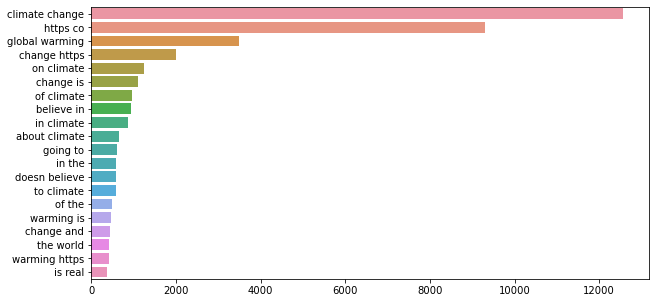

In [ ]:
# Function returns a bigram
def top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)#creating a bag of words 
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

plt.figure(figsize=(10,5))
top_tweet_bigram = top_tweet_bigrams(df_train['message'])[:20]
x,y=map(list,zip(*top_tweet_bigram))
sns.barplot(x=y,y=x)

### Non graphical multivariate analysis

Calculating the correlation to see if there is a relationship between sentimentnts .tweetid and messagelenth. We can see below  there is come good correlation between sentiments and tweet length

In [ ]:
df_train.corr()

,sentiment,tweetid,message_length
sentiment,1.000000,-0.003758,0.052893
tweetid,-0.003758,1.000000,0.005774
message_length,0.052893,0.005774,1.000000


### Multivariate analysis: Graphical


#### Heatmap

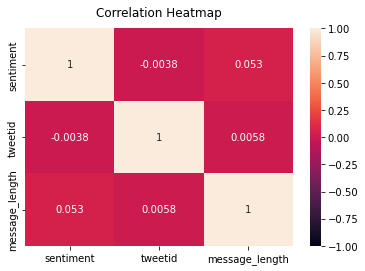

In [ ]:
heatmap = sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

for the test data

In [ ]:
test.info() #checking the number of rows and columns and data type for the test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


<a id="four"></a>
## 4. Data cleaning
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data Cleaning ⚡ |
| :--------------------------- |
|  clean the dataset, and possibly create new features -using Natural language process . |

In [6]:
df = train.copy() #getting a copy of the ooriginal data to do data cleaning

# **Tweets Data Preprocessing and Cleaning** 
The preprocessing of the text data is an essential step as it makes the raw text ready for modelling , we remove  noisy and inconsistent data

In [7]:
# convert sentiment  numbers into text
def sentiment(df):

    sentiment = df['sentiment']
    sentiment_class = []
    for i in sentiment:
        if i == 1:
            sentiment_class.append('Pro')
        elif i == 0:
            sentiment_class.append('Neutral')
        elif i == -1:
            sentiment_class.append('Anti')
        else:
            sentiment_class.append('News')

    df['sentiment'] = sentiment_class
    return df
df = sentiment(df)
df.head(10)

,sentiment,message,tweetid
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221
1,Pro,It's not like we lack evidence of anthropogeni...,126103
2,News,RT @RawStory: Researchers say we have three ye...,698562
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
5,Pro,Worth a read whether you do or don't believe i...,425577
6,Pro,RT @thenation: Mike Pence doesn’t believe in g...,294933
7,Pro,RT @makeandmendlife: Six big things we can ALL...,992717
8,Pro,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510
9,Pro,RT @paigetweedy: no offense… but like… how do ...,260471


In [8]:
# Extract the hashtags from the tweets
def extract_hashtags(df):

    df['hashtags'] = df['message'].str.findall(r'#.*?(?=\s|$)')
    df['hashtags'].apply(lambda x: np.nan if len(x) == 0 else [x.lower() for x in x])
    return df
    
extract_hashtags(df)


,sentiment,message,tweetid,hashtags
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221,[]
1,Pro,It's not like we lack evidence of anthropogeni...,126103,[]
2,News,RT @RawStory: Researchers say we have three ye...,698562,[]
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,[#TodayinMaker#]
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,[#ElectionNight]
...,...,...,...,...
15814,Pro,RT @ezlusztig: They took down the material on ...,22001,[]
15815,News,RT @washingtonpost: How climate change could b...,17856,[]
15816,Neutral,notiven: RT: nytimesworld :What does Trump act...,384248,[]
15817,Anti,RT @sara8smiles: Hey liberals the climate chan...,819732,[#Agenda2030.]


# Extracting hashtags for each Sentiment

In [9]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
    return hashtags

In [10]:
News = hashtag_extract(df['message'][df['sentiment'] == 'News'])
Pro = hashtag_extract(df['message'][df['sentiment'] == 'Pro'])
Neutral = hashtag_extract(df['message'][df['sentiment'] == 'Neutral'])
Anti = hashtag_extract(df['message'][df['sentiment'] == 'Anti'])

In [11]:
#creating the list
News = sum(News, []) # summing all the hashtags per sentiment
Pro = sum(Pro, [])
Neutral = sum(Neutral, [])
Anti = sum(Anti,[])


### Checking for Top 10 most used Hashtags for each Sentiments

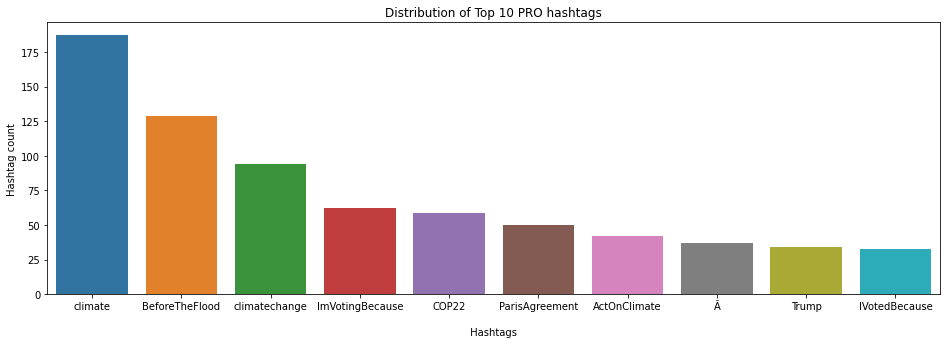

In [12]:
# making frequency distribution top 10 News hashtags
k = nltk.FreqDist(Pro)
d = pd.DataFrame({'Hashtag': list(k.keys()),
                  'Count' : list(k.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.title('Distribution of Top 10 PRO hashtags')
plt.xlabel('\n Hashtags ')
plt.ylabel('Hashtag count')
plt.show()

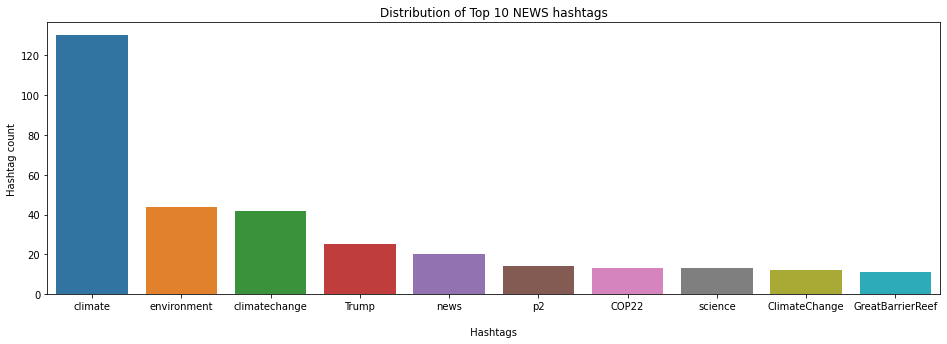

In [13]:
# making frequency distribution top 10 News hashtags
k = nltk.FreqDist(News)
d = pd.DataFrame({'Hashtag': list(k.keys()),
                  'Count' : list(k.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.title('Distribution of Top 10 NEWS hashtags')
plt.xlabel('\n Hashtags ')
plt.ylabel('Hashtag count')
plt.show()

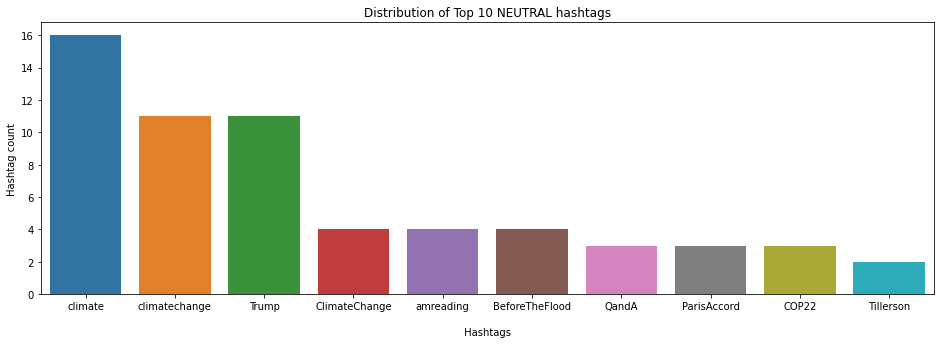

In [14]:
# making frequency distribution top 10 Neutral hashtags
k = nltk.FreqDist(Neutral)
d = pd.DataFrame({'Hashtag': list(k.keys()),
                  'Count' : list(k.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.title('Distribution of Top 10 NEUTRAL hashtags')
plt.xlabel('\n Hashtags ')
plt.ylabel('Hashtag count')
plt.show()

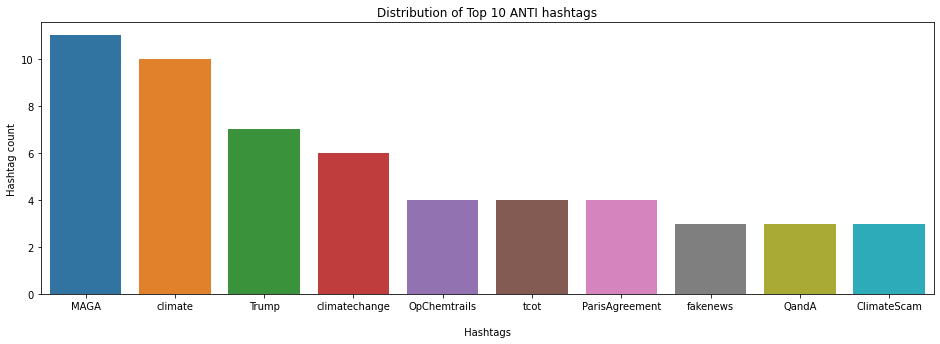

In [15]:
# making frequency distribution top 10 Anti hashtags
k = nltk.FreqDist(Anti)
d = pd.DataFrame({'Hashtag': list(k.keys()),
                  'Count' : list(k.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.title('Distribution of Top 10 ANTI hashtags')
plt.xlabel('\n Hashtags ')
plt.ylabel('Hashtag count')
plt.show()

Insights
- Sentiment class 1,2 and 0 have climate has the most occuring word used as a hashtag and for anti(-1) the most occuring hashtag is MAGA then followed by climate .The hashtag climate in anti was least used compared to other sentiment classes and that anti is the minority class also contributed since it doesnt have alot of tweets.  

In [ ]:
%pip install emoji

Note: you may need to restart the kernel to use updated packages.


## Emoji Analysis
### Extracting emojis from Tweets  

In [16]:
#extracting emojis
import emoji
def extract_emojis(s):
  return ''.join(c for c in s if c in emoji.UNICODE_EMOJI['en'])

In [17]:
#applying the extracting of emojis and creating an emoji column
df['emoji'] = df['message'].apply(extract_emojis)
df[df['emoji']!='']['emoji']

56       😂❄❄🤦♂
121          🤔
209       😂🔥🌎❄
230          ♂
488         🙄🙄
         ...  
15506        ⬆
15669        😠
15671        😄
15695        ⚡
15723        😨
Name: emoji, Length: 179, dtype: object

In [18]:
#convert emojis on the dataframe to text 
def text_emoji(txt):
  emoji_converter = emoji.demojize(txt, delimiters=("", ""))
  return emoji_converter

In [19]:
# #applying the converting def
# df['message'] = df['message'].apply(text_emoji)
# df.loc[56:60]

Looking for duplicated tweets 

In [20]:
# Check duplicate messages in the training data
dupl_train = df['message']
dupl_train = df[dupl_train.isin(dupl_train[dupl_train.duplicated()])].sort_values("message")

# Check duplicate tweetid's in the training data and to see that each message is unique
dupl_tweet_id = df['tweetid']
df[dupl_tweet_id.isin(dupl_tweet_id[dupl_tweet_id.duplicated()])].sort_values("message")

# Check for duplicate messages in the testing data
dupl_test = test['message']
dupl_test = test[dupl_test.isin(dupl_test[dupl_test.duplicated()])].sort_values("message")

# Check duplicate tweetid's in the testing data and to see that each message is unique
dupl_tweet_id = test['tweetid']
test[dupl_tweet_id.isin(dupl_tweet_id[dupl_tweet_id.duplicated()])].sort_values("message")

# View percentage of duplicates 
dupl_train_prop = (len(dupl_train)/len(df['message']))*100
dupl_test_prop = (len(dupl_test)/len(test['message']))*100
print('Train data percentange of Retweets:',str(round((dupl_train_prop),3))+"%")
print('Test data percentage of Retweets:',str(round((dupl_test_prop),3))+"%")

Train data percentange of Retweets: 12.061%
Test data percentage of Retweets: 11.037%


In [21]:
dupl_test.head(7)

,message,tweetid
5094,How can people be so ignorant when it comes to...,618984
9691,How can people be so ignorant when it comes to...,353129
960,Obamas fiddled global warming data: *Shameless...,818493
4866,Obamas fiddled global warming data: *Shameless...,122281
3341,RT @1followernodad: ok a climate change denier...,543287
4978,RT @1followernodad: ok a climate change denier...,176463
9601,RT @1followernodad: ok a climate change denier...,345248


We can see there is some duplicated tweets and this could be the results of retweet  there is two ways to deal with duplicates i.e delete them or leave them 

In [22]:
df.shape # checking the new shape of the df 

(15819, 5)

# Tweet cleaning 
This is for removing punctuations ,stopwords ,special characters ,numbers and html links 

In [23]:
#removinging @handles
#function for removing @user
def remove_user(input_txt):
    user_pattern = '@[\w]*'
    r = re.findall(user_pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,' ',input_txt)
    return input_txt

In [24]:
# remove twitter handles (@user) from train data
df['message'] =df['message'].apply(remove_user)
df.head(10)

,sentiment,message,tweetid,hashtags,emoji
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221,[],
1,Pro,It's not like we lack evidence of anthropogeni...,126103,[],
2,News,RT : Researchers say we have three years to a...,698562,[],
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,[#TodayinMaker#],
4,Pro,"RT : It's 2016, and a racist, sexist, climate...",466954,[#ElectionNight],
5,Pro,Worth a read whether you do or don't believe i...,425577,[],
6,Pro,RT : Mike Pence doesn’t believe in global war...,294933,[],
7,Pro,RT : Six big things we can ALL do today to fi...,992717,[],
8,Pro,My 8yo nephew is inconsolable. He wants to d...,664510,[],
9,Pro,RT : no offense… but like… how do you just no...,260471,[],


### Tweet Cleaning
This is to remove noise from the data such as punctuatioon ,characters and other things to make the data more clean.

In [25]:
import re
import string
from nltk.stem import PorterStemmer
import unidecode

def process_tweet(tweet):
    """
    Process tweet function.
    Input:
        tweet: a string containing a tweet
    Returns:
        tweets_clean: a list of words containing the processed tweet
        """
    # Removing Hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Removing Retweets
    tweet = re.sub('#(RT|rt)*', '', tweet)
    # Remove Numbers and words with Num
    tweet = re.sub('\w*\d\w*', '', tweet)
    # removing @mentions
    tweet= re.sub(r'@[A-Za-z0-9]+', '', tweet)
    tweet = re.sub(r'@[A-Za-zA-Z0-9]+', '', tweet)
    tweet = re.sub(r'@[A-Za-z]+', '', tweet)
    tweet = re.sub(r'@[-)]+', '', tweet)
    # removing #sign from tweet
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub(r"[,.;':@#?!\&/$]+\ *", ' ', tweet)
    # remove the '&gt;'
    tweet = re.sub(r'&[a-z;]+', '', tweet)
    # Remove extra space
    twet = re.sub(r'\s\s+', ' ', tweet)
    # Remove space some space in the beggining of the tweet
    tweet = tweet.lstrip(' ')
    tweet = re.sub(r"U+FFFD ", ' ', tweet)
    
    return tweet.lower()
    

In [26]:
# cleaning the text of train data
df['message'] = df['message'].apply(lambda x: process_tweet(x))
df['message'] = df['message'].apply(unidecode.unidecode)
# show the cleaned text 
df.head(10)

,sentiment,message,tweetid,hashtags,emoji
0,Pro,polyscimajor epa chief doesn t think carbon di...,625221,[],
1,Pro,it s not like we lack evidence of anthropogeni...,126103,[],
2,News,rt researchers say we have three years to ac...,698562,[],
3,Pro,todayinmaker wired was a pivotal year in the ...,573736,[#TodayinMaker#],
4,Pro,rt it s and a racist sexist climate change ...,466954,[#ElectionNight],
5,Pro,worth a read whether you do or don t believe i...,425577,[],
6,Pro,rt mike pence doesn't believe in global warm...,294933,[],
7,Pro,rt six big things we can all do today to fig...,992717,[],
8,Pro,my nephew is inconsolable he wants to die of ...,664510,[],
9,Pro,rt no offense... but like... how do you just...,260471,[],


removing punctuation

In [ ]:
def remove_punctuation(text):
  stringpunct = string.punctuation 
  return ''.join([i for i in text if i not in stringpunct])
df['message'] = df['message'].apply(remove_punctuation)


Removing stop words

In [27]:
stop_list=list(stopwords.words('english'))

# Removing StopWord
def Change_text(tweet):
  main_text=[word for word in tweet.split() if word.lower() not in stop_list]
  return ' '.join(main_text)

In [28]:
# Stop words Removal from train data
df['message'] = df['message'].apply(Change_text)
df.head(2)

,sentiment,message,tweetid,hashtags,emoji
0,Pro,polyscimajor epa chief think carbon dioxide ma...,625221,[],
1,Pro,like lack evidence anthropogenic global warming,126103,[],


# Removing Short Words

In [29]:
# remove short words
df['message'] = df['message'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))
df.head(2)

,sentiment,message,tweetid,hashtags,emoji
0,Pro,polyscimajor epa chief think carbon dioxide ma...,625221,[],
1,Pro,like lack evidence anthropogenic global warming,126103,[],



### 1. Tokenization

It consists in dividing the texts into words or smaller sub-texts, allowing us to determine the “vocabulary” of the dataset (set of unique tokens present in the data). Usually we use word-level representation.
in this case we will use `tweettokenizer` 



In [30]:
# Tokenizinging tweet train data
#df['message'] = df['message'].apply(lambda x: x.split())
tokenizer2 = TweetTokenizer(reduce_len=True)
df['message'] = df['message'].apply(tokenizer2.tokenize)
df.head(2)

,sentiment,message,tweetid,hashtags,emoji
0,Pro,"[polyscimajor, epa, chief, think, carbon, diox...",625221,[],
1,Pro,"[like, lack, evidence, anthropogenic, global, ...",126103,[],


## 2.Stemming or lemmatizing

uncomment one of the options  below to use 

OPTION 1 stemming
- Stemming the words can reduce its meaning or number of charaters in the word 
- Stemming is a much faster process 
for example `change/changed/changer` to `chang` the last letter is removed


In [ ]:
#from nltk.stem.porter import *
#stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
#df['message'] = df['message'].apply(lambda x: [stemmer.stem(i) for i in x])

OPTION 2 Lemmatizing 
- Lemmatizing entails reducing a word to its canonical or dictionary form.
for example `change/changed/changer`  to `change` is doesnt cut the word.
- it is highly accurate than stemming 


In [31]:
#uncomment if you wanna use this option
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

def lemm_stem(tokens: str) -> str:
    return [lemm.lemmatize(token) for token in tokens]

df['message'] = df['message'].apply(lemm_stem)

In [32]:
df.head(10)

,sentiment,message,tweetid,hashtags,emoji
0,Pro,"[polyscimajor, epa, chief, think, carbon, diox...",625221,[],
1,Pro,"[like, lack, evidence, anthropogenic, global, ...",126103,[],
2,News,"[researcher, say, three, year, act, climate, c...",698562,[],
3,Pro,"[todayinmaker, wired, pivotal, year, war, clim...",573736,[#TodayinMaker#],
4,Pro,"[racist, sexist, climate, change, denying, big...",466954,[#ElectionNight],
5,Pro,"[worth, read, whether, believe, climate, change]",425577,[],
6,Pro,"[mike, penny, believe, global, warming, smokin...",294933,[],
7,Pro,"[six, big, thing, today, fight, climate, chang...",992717,[],
8,Pro,"[nephew, inconsolable, want, die, old, age, li...",664510,[],
9,Pro,"[offense, ..., like, ..., believe, ..., global...",260471,[],


Changing back the sentiment to numbers

In [33]:
def sentiment(df):
  
  sentiment = df['sentiment']
  sentiment_class = []

  for i in sentiment :
      if i == 'Pro' :
          sentiment_class.append(1)
      elif i == 'Neutral' :
          sentiment_class.append(0)
      elif i == 'Anti' :
          sentiment_class.append(-1)
      else :
          sentiment_class.append(2)

  df['sentiment'] = sentiment_class
    
  return df
df = sentiment(df.copy())
df.head()

,sentiment,message,tweetid,hashtags,emoji
0,1,"[polyscimajor, epa, chief, think, carbon, diox...",625221,[],
1,1,"[like, lack, evidence, anthropogenic, global, ...",126103,[],
2,2,"[researcher, say, three, year, act, climate, c...",698562,[],
3,1,"[todayinmaker, wired, pivotal, year, war, clim...",573736,[#TodayinMaker#],
4,1,"[racist, sexist, climate, change, denying, big...",466954,[#ElectionNight],


Changing the cleaned message back to a sentences

In [34]:
tokenized_message =df['message']

code takes MORE than 7 minutes to run

In [35]:
# join tokens into one sentence
for i in range(len(tokenized_message)):
    tokenized_message[i] = ' '.join(tokenized_message[i])
df['message']=tokenized_message #replacing message with tokenised words
df.head()

C:\Users\f5468981\AppData\Local\Temp/ipykernel_5116/1319546772.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tokenized_message[i] = ' '.join(tokenized_message[i])


,sentiment,message,tweetid,hashtags,emoji
0,1,polyscimajor epa chief think carbon dioxide ma...,625221,[],
1,1,like lack evidence anthropogenic global warming,126103,[],
2,2,researcher say three year act climate change l...,698562,[],
3,1,todayinmaker wired pivotal year war climate ch...,573736,[#TodayinMaker#],
4,1,racist sexist climate change denying bigot lea...,466954,[#ElectionNight],


# Visualisation of data

## Analysing the most common words used in the tweets

The common words used in the tweets: WordCloud

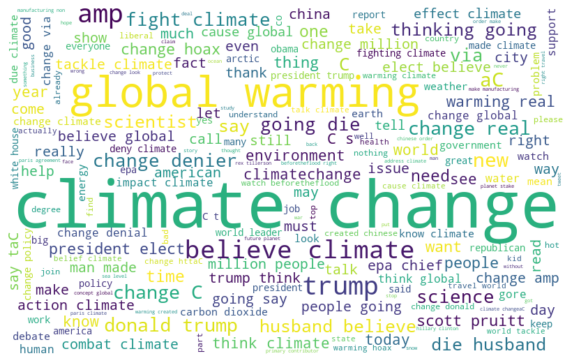

In [36]:
# create text from all tweets
all_words = ' '.join([str(text) for text in df['message']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500,background_color="white", random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Common words used for Sentiment 1

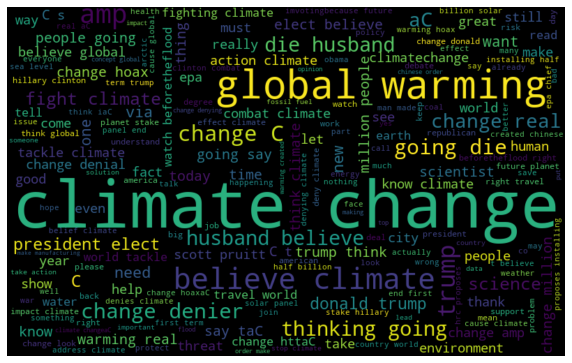

In [37]:
# create text from just normal tweets
normal_words = ' '.join([str(text) for text in df['message'][df['sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500,background_color="black", random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Common words used for Sentiment 0

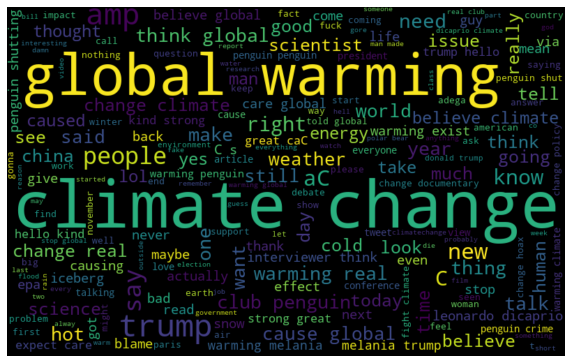

In [38]:
# create text from just normal tweets
normal_words = ' '.join([str(text) for text in df['message'][df['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500,background_color="black", random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Common words used for Sentiment -1

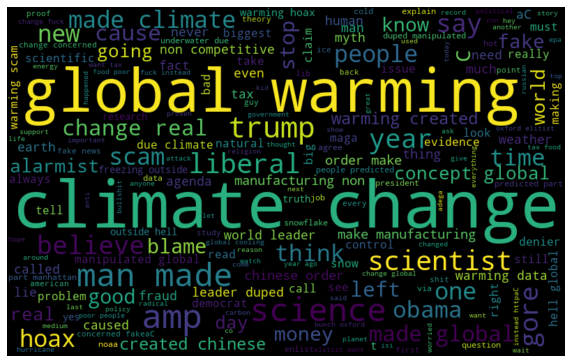

In [39]:
# create text from just normal tweets
normal_words = ' '.join([str(text) for text in df['message'][df['sentiment'] == -1]])

wordcloud = WordCloud(width=800, height=500,background_color="black", random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Common words used for Sentiment 2

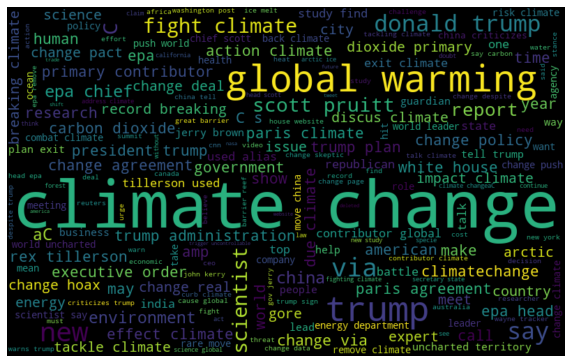

In [40]:
# create text from just normal tweets
normal_words = ' '.join([str(text) for text in df['message'][df['sentiment'] == 2]])

wordcloud = WordCloud(width=800, height=500,background_color="black", random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Insight
for the anti sentiment class we can see people prefer to use global warning more than climate change while for other sentiment classes people prefer using the word climate change more .

In [ ]:
df.columns

Index(['sentiment', 'message', 'tweetid', 'hashtags', 'emoji'], dtype='object')

### Analyising the Hashtags

Common Hashtags used for Sentiment 1

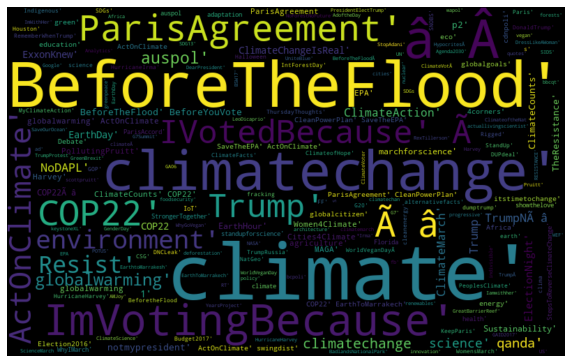

In [ ]:
# create text from just normal tweets
normal_words = ' '.join([str(text) for text in df['hashtags'][df['sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500,background_color="black", random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Common Hashtags used for Sentiment 0

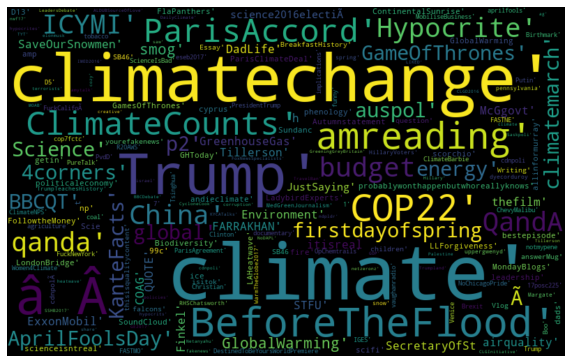

In [ ]:
# create text from just normal tweets
normal_words = ' '.join([str(text) for text in df['hashtags'][df['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500,background_color="black", random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Common Hashtags used for Sentiment -1

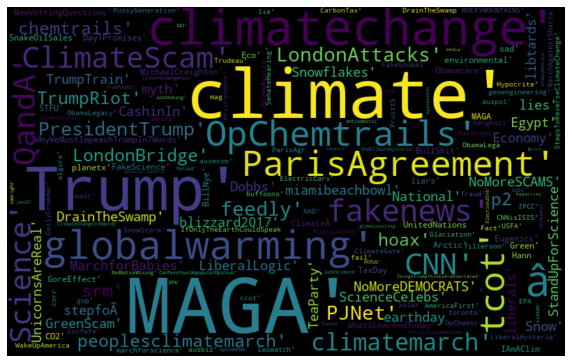

In [ ]:
# create text from just normal tweets
normal_words = ' '.join([str(text) for text in df['hashtags'][df['sentiment'] == -1]])

wordcloud = WordCloud(width=800, height=500,background_color="black", random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Common Hashtags used for Sentiment 2

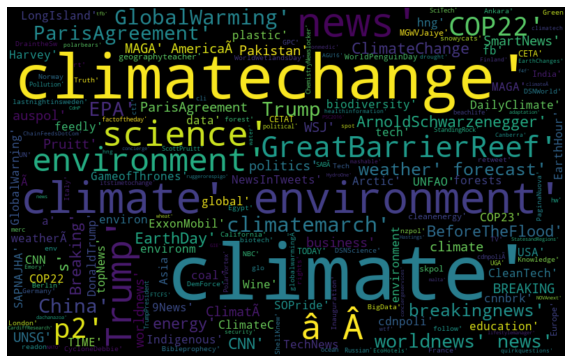

In [ ]:
# create text from just normal tweets
normal_words = ' '.join([str(text) for text in df['hashtags'][df['sentiment'] == 2]])

wordcloud = WordCloud(width=800, height=500,background_color="black", random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Analysing Emojis

In [ ]:
df['emo'] = df['emoji'].apply(text_emoji)#changing emojis to text


Analysing emojis mostly used in sentement -1

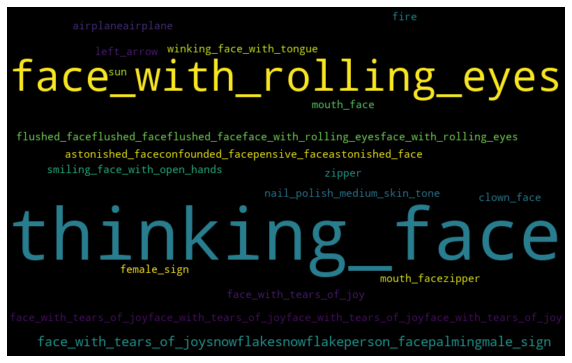

In [ ]:
# create text from just normal tweets
normal_words = ' '.join([str(text) for text in df['emo'][df['sentiment'] == -1]])
#creating the word cloud containning only text emojis
wordcloud = WordCloud(width=800, height=500,background_color="black",
            random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Analysing the emojis for all the tweet message  to form a wordcloud 

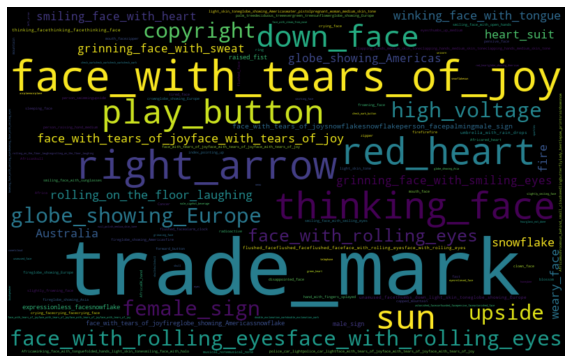

In [ ]:
# create text from just normal tweets
normal_words = ' '.join([str(text) for text in df['emo']])
#creating the word cloud containning only text emojis
wordcloud = WordCloud(width=800, height=500,background_color="black", 
            random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

For the anti class most people used emojies such as `face with rolling eyes` emoji and `thinking face` the appear more frequently than  in any other classes.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
 3   hashtags   15819 non-null  object
 4   emoji      15819 non-null  object
 5   emo        15819 non-null  object
dtypes: int64(2), object(4)
memory usage: 741.6+ KB


### Preprocessing the test data


In [ ]:
df_test=test.copy()

In [ ]:
# Extract the hashtags from the tweets from the test data

def extract_hashtags(df_test):

  df_test['hashtags'] = df_test['message'].str.findall(r'#.*?(?=\s|$)')
  df_test['hashtags'] = df_test['hashtags'].apply(lambda x: np.nan if len(x)==0 else [x.lower() for x in x])
    
  return df_test

extract_hashtags(df_test)

,message,tweetid,hashtags
0,Europe will now be looking to China to make su...,169760,NaN
1,Combine this with the polling of staffers re c...,35326,NaN
2,"The scary, unimpeachable evidence that climate...",224985,"[#itstimetochange, #climatechange]"
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263,NaN
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,NaN
...,...,...,...
10541,"RT @BrittanyBohrer: Brb, writing a poem about ...",895714,"[#climatechange, #science, #poetry, #fakenews,..."
10542,2016: the year climate change came home: Durin...,875167,NaN
10543,RT @loop_vanuatu: Pacific countries positive a...,78329,NaN
10544,"RT @xanria_00018: You’re so hot, you must be t...",867455,[#aldublaboroflove]


### Extracting emojis and converting emojis to text

In [ ]:
import emoji
def extract_emojis(s):
  return ''.join(c for c in s if c in emoji.UNICODE_EMOJI['en'])

In [ ]:
#Extracting emojies
df_test['emoji'] = df_test['message'].apply(extract_emojis)
df_test[df_test['emoji']!='']['emoji']

98              😔
121             ™
133             ™
146           🤷🏻♀
177      🐼🐻🐝🐠🐚🌷🍀🌎
           ...   
10199           ⚡
10261           ™
10316         ❄❄❄
10378          ▶▶
10480          👍🏼
Name: emoji, Length: 120, dtype: object

In [ ]:
# df_test['message'] = df_test['message'].apply(text_emoji)
# df_test.loc[98:100]

In [ ]:
# remove twitter handles (@user) from test data
df_test['message'] =df_test['message'].apply(remove_user)

In [ ]:
# cleaning the text of train data
df_test['message'] = df_test['message'].apply(lambda x: process_tweet(x))

# show the cleaned text 
df_test.head(10)

,message,tweetid,hashtags,emoji
0,europe will now be looking to china to make su...,169760,NaN,
1,combine this with the polling of staffers re c...,35326,NaN,
2,the scary unimpeachable evidence that climate ...,224985,"[#itstimetochange, #climatechange]",
3,\nputin got to you too jill \ntrump doesn t b...,476263,NaN,
4,rt female orgasms cause global warming \n-s...,872928,NaN,
5,rt trump muzzles employees of several gov’t ...,75639,[#climate],
6,yes wrote that in yr comp sci ethics part was...,211536,NaN,
7,rt indonesian farmers weather climate change...,569434,[#climate],
8,rt british scientists face a ‘huge hit’ if t...,315368,NaN,
9,aid for agriculture | sustainable agriculture ...,591733,NaN,


In [ ]:
#removing the punctuation
def remove_punctuation(text):
  stringpunct = string.punctuation 
  return ''.join([i for i in text if i not in stringpunct])
df_test['message'] = df_test['message'].apply(remove_punctuation)

In [ ]:
# Stop words Removal from train data
df_test['message'] = df_test['message'].apply(Change_text)

### Removing Short Words

In [ ]:
#remove short words
df_test['message'] = df_test['message'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))


1. Tokenization

In [ ]:
# Tokenizinging tweet test data
#df_test['message'] = df_test['message'].apply(lambda x: x.split())
df_test['message'] = df_test['message'].apply(tokenizer2.tokenize)

choose one between stemming and lemmatising

stemming

In [ ]:
# apply stemmer for tokenized_tweet
#porter stemmer
#df_test['message'] = df_test['message'].apply(lambda x: [stemmer.stem(i) for i in x])

Lemmetizing
if wanna use it uncomment below 

In [ ]:
#uncomment if you wanna use this option
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

def lemm_stem(tokens: str) -> str:
    return [lemm.lemmatize(token) for token in tokens]

df_test['message'] = df_test['message'].apply(lemm_stem)

Changing tokenised into the sentences  

In [ ]:
tokenized_message =df_test['message']
# join tokens into one sentence
for i in range(len(tokenized_message)):
    tokenized_message[i] = ' '.join(tokenized_message[i])
df_test['message']=tokenized_message# replaced messages with tokenised message
df.head()

C:\Users\f5468981\AppData\Local\Temp/ipykernel_11920/3084156190.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tokenized_message[i] = ' '.join(tokenized_message[i])


,sentiment,message,tweetid,hashtags,emoji,emo
0,1,polyscimajor epa chief think carbon dioxide ma...,625221,[],,
1,1,like lack evidence anthropogenic global warming,126103,[],,
2,2,researcher say three year act climate change i...,698562,[],,
3,1,todayinmaker wired pivotal year war climate ch...,573736,[#TodayinMaker#],,
4,1,racist sexist climate change denying bigot lea...,466954,[#ElectionNight],,


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, create one or more regression models that are able to accurately predict the Sentiment. |

---

In [ ]:
# Seperate features and tagret variables
y = df['sentiment']
X = df['message']

### Methods of vectorising 
uncomment one below

# **Option 1** 
Changing text into something readable by machine learning model
- TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction ,It uses matrix 

In [ ]:
 vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=2,max_df= 0.5)
 X_vectorized = vectorizer.fit_transform(X)

# **Option 2** 
Changing text into something readable by machine learning model.
- CounterVectorizer This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction ,Convert a collection of text documents to a matrix of token counts

In [ ]:
# cv = CountVectorizer(ngram_range=(1, 2),min_df=5,max_df= 0.5)
# X_vectorized = cv.fit_transform(X)

Choose option 1 or 2 

### We split the data after choosing one of the options above

In [ ]:
# Split the train data to create validation dataset
X_train,X_test,y_train,y_test = train_test_split(X_vectorized,y,test_size=0.10,shuffle=True, stratify=y, random_state=42)

In [ ]:
X_train.shape #checling the shapes of the x_train

(14237, 19092)

# Building classification models!

In [ ]:
from sklearn import metrics

We buid multiple models  then  evaluete the perfomance of the model we use the f1 score 
- f1 score = The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0,F1 = 2 * (precision * recall) / (precision + recall)
- precision
- recall
- accuracy


In [ ]:
from sklearn.naive_bayes import CategoricalNB

In [ ]:
names = ['Logistic Regression', 'Nearest Neighbors','MultinomialNB','svn','Supportvectomachine','LinearSupportvectomachine'
         ,'SGDClassifier','ComplementNB', 'Random Forest']

In [ ]:
classifiers = [
    LogisticRegression(C=10,
            max_iter= 1000,
            multi_class='ovr',
            random_state= 111,
            solver= 'saga'),
    KNeighborsClassifier(n_neighbors=4),
    MultinomialNB(alpha = 0.1),
    svm.SVC(),
    svm.SVC(kernel='linear',C = 0.25,gamma= 'scale',decision_function_shape='ovr'),
    LinearSVC(max_iter=10000),
    SGDClassifier(loss='hinge',
                    penalty='l2',
                    alpha=1e-3,
                    random_state=42,
                    max_iter=10000),
    ComplementNB(alpha=0.01),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
]

<a id="seven"></a>
## 6. Model Evaluation and Perfomance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: using f1 score,accuracy and precision  ⚡ |
| :--------------------------- |
||

---

In [ ]:
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)

    print ('... predicting')
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred,)
    precision = metrics.precision_score(y_train, y_pred,average='weighted')
    recall    = metrics.recall_score(y_train, y_pred,average="weighted")

    f1        = metrics.f1_score(y_train, y_pred,average="weighted")
    f1_test   = metrics.f1_score(y_test, y_pred_test,average="weighted")

    # Save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])


results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... ALL models done running ')

Fitting Logistic Regression model...
... predicting
... scoring
Fitting Nearest Neighbors model...
... predicting
... scoring
Fitting MultinomialNB model...
... predicting
... scoring
Fitting svn model...
... predicting
... scoring
Fitting Supportvectomachine model...
... predicting
... scoring
Fitting LinearSupportvectomachine model...
... predicting
... scoring
Fitting SGDClassifier model...
... predicting
... scoring
Fitting ComplementNB model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring


c:\Users\f5468981\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\f5468981\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\f5468981\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\f5468981\Anaconda3\lib\site-packages\sklearn\metri

... ALL models done running 


In [ ]:
results.sort_values('F1', ascending=False)

,Accuracy,Precision,Recall,F1,F1 Test,Train Time
Classifier,,,,,,
LinearSupportvectomachine,0.971974,0.972219,0.971974,0.971854,0.699238,0.152245
Logistic Regression,0.968392,0.968760,0.968392,0.968219,0.705798,0.990478
svn,0.944581,0.947025,0.944581,0.943536,0.678144,41.320659
ComplementNB,0.898082,0.902815,0.898082,0.898849,0.651702,0.004143
MultinomialNB,0.899628,0.900910,0.899628,0.898439,0.698210,0.004917
Supportvectomachine,0.720306,0.777465,0.720306,0.676349,0.614689,24.917879
Nearest Neighbors,0.624289,0.742734,0.624289,0.646632,0.432333,0.001699
SGDClassifier,0.620917,0.731260,0.620917,0.541511,0.517517,0.070013
Random Forest,0.539229,0.290768,0.539229,0.377810,0.377766,0.026826


comet experiment for high perfoming models 

In [ ]:
#creating experiment on comet
experiment = Experiment(
    api_key="rI7gAvhuv8lNvQcjSox3TjwIF",
    project_name="team-cbb-3-classification",#project name on comet
    workspace="elelwani-tshikovhi",
)
#calling the model and fitting 
modelstart = time.time()
logreg = LogisticRegression(C=1000,
        max_iter= 10,
        multi_class='multinomial',
        random_state= 220,
        solver= 'saga')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall    = recall_score(y_test, y_pred,average='weighted')
f1        = f1_score(y_test, y_pred,average ='weighted')
print(classification_report(y_test, y_pred))
#comet experiment
params = {
    "random_state": 220,
    "model_type": "LogisticRegression",
    "vectorizer": "TfidfVectorizer",# replace with TfidfVectorizer if used option 1
    'C': 1000,
    'max_iter': 10,
    'multi_class': 'multinomial',
    'solver':  'saga',
    "stratify" : 'True'
 }
metrics = {
     "precision": precision,
     "recall": recall,
     "f1": f1,
     "accuracy": accuracy
 }

experiment.log_parameters(params)
experiment.log_metrics(metrics)
experiment.end()


COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn, xgboost, tensorboard, keras, tensorflow. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/elelwani-tshikovhi/team-cbb-3-classification/8c0f5b9862ef4e6fb86caba70c817cd7
COMET INFO:   Uploads:
COMET INFO:     conda-info               : 1
COMET INFO:     conda-specification      : 1
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (238.82 KB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO

              precision    recall  f1-score   support

          -1       0.67      0.49      0.57       130
           0       0.49      0.40      0.44       235
           1       0.74      0.83      0.78       853
           2       0.76      0.71      0.73       364

    accuracy                           0.71      1582
   macro avg       0.66      0.61      0.63      1582
weighted avg       0.70      0.71      0.70      1582



COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/elelwani-tshikovhi/team-cbb-3-classification/9a0917c1bc684c9a8c04f6d6f0b4febe
COMET INFO:   Metrics:
COMET INFO:     accuracy  : 0.7092288242730721
COMET INFO:     f1        : 0.7019117189966442
COMET INFO:     precision : 0.7012174320900311
COMET INFO:     recall    : 0.7092288242730721
COMET INFO:   Parameters:
COMET INFO:     C            : 5
COMET INFO:     max_iter     : 10
COMET INFO:     model_type   : LogisticRegression
COMET INFO:     multi_class  : ovr
COMET INFO:     random_state : 220
COMET INFO:     solver       : sag
COMET INFO:     stratify     : True
COMET INFO:     vectorizer   : TfidfVectorizer
COMET INFO:   Uploads:
COMET INFO:     conda-info               : 1
COMET INFO:     conda-specification      : 1
COMET INFO:     environm

In [ ]:
experiment = Experiment(
    api_key="rI7gAvhuv8lNvQcjSox3TjwIF",
    project_name="team-cbb-3-classification",#project name on comet
    workspace="elelwani-tshikovhi",
)
# Create an experiment with your api key
from sklearn.svm import SVC
modelstart = time.time() 
svc = SVC(C = 5,decision_function_shape='ovo' ,kernel= 'rbf', random_state= 42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print("accuracy of the model is {}".format(svc.score(X_test, y_test)))
print('f1 score of  Support vector machine{}'.format(f1_score(y_test, y_pred, average='weighted')))
print('precision score of  Support vector machine is {}'.format(precision_score(y_test, y_pred, average="weighted")))
print(classification_report(y_test, y_pred))
#comet experiment
params = {
    "random_state": 42,
    "model_type": "Linear Support vector machine  ",
    "vectorizer": "TfidfVectorizer",# replace CountVectorizer with  if used option 1
    'C':0.25,
    'gamma': 'scale',
    'decision_function_shape':'ovr' }
metrics = {
     "precision": precision_score(y_test, y_pred, average='weighted'),
     "recall": recall_score(y_test, y_pred, average='weighted'),
     "f1": f1_score(y_test, y_pred, average='weighted'),
 }

experiment.log_parameters(params)
experiment.log_metrics(metrics)
experiment.end()

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn, xgboost, tensorboard, keras, tensorflow. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/elelwani-tshikovhi/team-cbb-3-classification/b93bb18ea65c40528451b62ef0569536

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1


accuracy of the model is 0.7281921618204804
f1 score of  Support vector machine0.7102190146230329
precision score of  Support vector machine is 0.7254110606425539
              precision    recall  f1-score   support

          -1       0.76      0.37      0.50       130
           0       0.63      0.36      0.46       235
           1       0.72      0.89      0.80       853
           2       0.79      0.71      0.74       364

    accuracy                           0.73      1582
   macro avg       0.72      0.58      0.62      1582
weighted avg       0.73      0.73      0.71      1582



COMET INFO:     url                   : https://www.comet.ml/elelwani-tshikovhi/team-cbb-3-classification/b93bb18ea65c40528451b62ef0569536
COMET INFO:   Metrics:
COMET INFO:     f1        : 0.7102190146230329
COMET INFO:     precision : 0.7254110606425539
COMET INFO:     recall    : 0.7281921618204804
COMET INFO:   Parameters:
COMET INFO:     C                       : 0.25
COMET INFO:     decision_function_shape : ovr
COMET INFO:     gamma                   : scale
COMET INFO:     model_type              : Linear Support vector machine  
COMET INFO:     random_state            : 42
COMET INFO:     vectorizer              : TfidfVectorizer
COMET INFO:   Uploads:
COMET INFO:     conda-info               : 1
COMET INFO:     conda-specification      : 1
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (238.65 KB)
COMET INFO:     installed packages       : 1
COM

In [ ]:
experiment = Experiment(
    api_key="rI7gAvhuv8lNvQcjSox3TjwIF",
    project_name="team-cbb-3-classification",#project name on comet
    workspace="elelwani-tshikovhi",
)
modelstart = time.time() 
sgb = SGDClassifier(loss='modified_huber',penalty='l2',max_iter=50, tol=0.0001)
sgb.fit(X_train, y_train)
y_pred = sgb.predict(X_test)
# Calculate the loss 
print("accuracy of the model is {}".format(sgb.score(X_test, y_test)))
print('f1 score of Stochastic Gradient descent  Classifier {}'.format(f1_score(y_test, y_pred, average='weighted')))
print('precision score of Stochastic Gradient descent  Classifier is {}'.format(precision_score(y_test, y_pred, average="weighted")))
print(classification_report(y_test, y_pred))
#comet experiment
params = {
    "random_state": 42,
    "model_type": "Stochastic Gradient descent  Classifier",
    "vectorizer": "TfidfVectorizer",# replace with TfidfVectorizer if used option 1
    'loss':'modified_huber',
    'penalty':'l2',
    'max_iter':50,
    'tol':0.0001
}
metrics = {
     "precision": precision_score(y_test, y_pred, average='weighted'),
     "recall": recall_score(y_test, y_pred, average='weighted'),
     "f1": f1_score(y_test, y_pred, average='weighted'),
 }

experiment.log_parameters(params)
experiment.log_metrics(metrics)
experiment.end()

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn, xgboost, tensorboard, keras, tensorflow. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/elelwani-tshikovhi/team-cbb-3-classification/e593ab4a42b54f00a432e4199d417c7e



accuracy of the model is 0.7130214917825537
f1 score of Stochastic Gradient descent  Classifier 0.7021316116513117
precision score of Stochastic Gradient descent  Classifier is 0.7023761418780892
              precision    recall  f1-score   support

          -1       0.67      0.45      0.53       130
           0       0.53      0.38      0.44       235
           1       0.74      0.84      0.79       853
           2       0.75      0.72      0.73       364

    accuracy                           0.71      1582
   macro avg       0.67      0.60      0.62      1582
weighted avg       0.70      0.71      0.70      1582



COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/elelwani-tshikovhi/team-cbb-3-classification/e593ab4a42b54f00a432e4199d417c7e
COMET INFO:   Metrics:
COMET INFO:     f1        : 0.7021316116513117
COMET INFO:     precision : 0.7023761418780892
COMET INFO:     recall    : 0.7130214917825537
COMET INFO:   Parameters:
COMET INFO:     loss         : modified_huber
COMET INFO:     max_iter     : 50
COMET INFO:     model_type   : Stochastic Gradient descent  Classifier
COMET INFO:     penalty      : l2
COMET INFO:     random_state : 42
COMET INFO:     tol          : 0.0001
COMET INFO:     vectorizer   : CountVectorizer
COMET INFO:   Uploads:
COMET INFO:     conda-info               : 1
COMET INFO:     conda-specification      : 1
COMET INFO:     environment details      : 1
COMET INFO:     filename   

c:\Users\f5468981\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


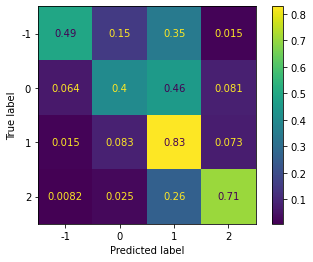

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test, y_test,normalize="true")
plt.show()

c:\Users\f5468981\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


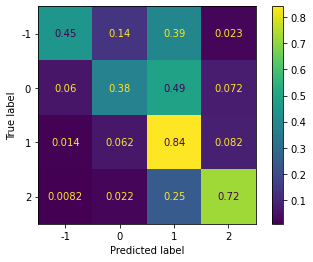

In [ ]:
plot_confusion_matrix(sgb, X_test, y_test,normalize="true")
plt.show()

# Hypertuning top 3 Models 

Hypertuning the Sopport Vector Machine 

In [ ]:
#hypertuning
parameters = {'kernel':['linear', 'rbf'],
              'C':[5],
              'decision_function_shape':['ovo','ovr'],
              'random_state':[42]}
svm =SVC()
clf = GridSearchCV(svm, parameters)
clf.fit(X_train,y_train)
print("Best parameters:")
gbc_params = clf.best_params_
print(clf.best_params_)
print('accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best parameters:
{'C': 5, 'decision_function_shape': 'ovo', 'kernel': 'rbf', 'random_state': 42}
accuracy 0.7130214917825537
              precision    recall  f1-score   support

          -1       0.67      0.45      0.53       130
           0       0.53      0.38      0.44       235
           1       0.74      0.84      0.79       853
           2       0.75      0.72      0.73       364

    accuracy                           0.71      1582
   macro avg       0.67      0.60      0.62      1582
weighted avg       0.70      0.71      0.70      1582



Hypertuning the Stochastic Gradient Descent

In [ ]:
param_grid = {'alpha':[0.01,0.1,0.3,0.5],
'loss' : ['hinge', 'log_loss', 'perceptron'],
 'max_iter': [1000,100,50],
 'tol':[0.01,0.0001]}
grid_sgdc = GridSearchCV(SGDClassifier(), param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
grid_sgdc.fit(X_train, y_train)
y_pred = grid_sgdc.predict(X_test)
sgdc_params=grid_sgdc.best_params_
print(grid_sgdc.best_params_)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

{'alpha': 0.3, 'loss': 'perceptron', 'max_iter': 50, 'tol': 0.0001}
accuracy 0.6820480404551201
              precision    recall  f1-score   support

          -1       0.59      0.42      0.49       130
           0       0.44      0.42      0.43       235
           1       0.75      0.78      0.76       853
           2       0.69      0.71      0.70       364

    accuracy                           0.68      1582
   macro avg       0.62      0.58      0.60      1582
weighted avg       0.68      0.68      0.68      1582



Hypertuning logistic regression 

In [ ]:
#parameters to use
param_grid = {'C': [0.05,10,5,100,50],
              'max_iter': [1000,100],
              'multi_class': ['ovr', 'multinomial'],
              'random_state': [220,111,20,10],
              'solver': [ 'sag', 'saga'],
            }
grid_LR = GridSearchCV(LogisticRegression(), param_grid, scoring='f1_weighted', cv=5,verbose =5,n_jobs=-1)
grid_LR.fit(X_train, y_train)
y_pred = grid_LR.predict(X_test)
print("Best parameters:")
lr_params = grid_LR.best_params_
print(grid_LR.best_params_)
print('accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best parameters:
{'C': 5, 'max_iter': 1000, 'multi_class': 'multinomial', 'random_state': 10, 'solver': 'saga'}
accuracy 0.7174462705436156
              precision    recall  f1-score   support

          -1       0.66      0.42      0.51       130
           0       0.54      0.37      0.44       235
           1       0.74      0.85      0.79       853
           2       0.76      0.73      0.75       364

    accuracy                           0.72      1582
   macro avg       0.67      0.59      0.62      1582
weighted avg       0.71      0.72      0.71      1582



# Solving the imbalanced data using  downsapmling and upsampling 

Oversampling and undersampling in data analysis are techniques used to adjust the class distribution of a data set. We saw that sentiment 1 has large class distribution of data compared to the other classes and model perfomance may be affected by the imbalanced data 

Using oversampling(upsampling) Algorithms to oversampling.
We resample other classes to have the same number in each class as the sentiment 1 so that all classes have same number of distrubution

In [ ]:
%pip install imblearn

In [ ]:
# x= df["message"]
# y = df["sentiment"]
# #vectorizer
# cv =TfidfVectorizer(ngram_range=(1,2), min_df=2,max_df =0.5)
# X = cv.fit_transform(x)

# #splitting the data
# X_train, X_test, y_train, y_test = train_test_split(X, y,

#                                                     test_size=0.10,

#                                                     random_state=42)

# x_test = cv.transform(test["message"]) #going to use the test data to test the performance of the test and for submission file

# # to see thre distribution before resampling 
# print("before oversampling ,counts for labels '1':{}".format(sum(y_train == 1)))
# print("before oversampling ,counts for labels '2':{}".format(sum(y_train == 0)))
# print("before oversampling ,counts for labels '2':{}".format(sum(y_train == 2)))
# print("before oversampling ,counts for labels '-1':{}".format(sum(y_train == -1)))

# #importing sampling packages 
# from imblearn.over_sampling import SMOTE,RandomOverSampler,ADASYN
# #ros= RandomOverSampler()
# #sm =SMOTE(random_state = 10)

# ada = ADASYN(random_state=42)
# x_train_res,y_train_res = ada.fit_resample(X_train,y_train.ravel())#fitting the resampler 

# print('after oversampling, the shape train_X:{}'.format(x_train_res.shape))
# print('after oversampling, the shape train_y:{}'.format(y_train_res.shape))

# #to see the distribution of each class after resampling 
# print("after oversampling ,counts for labels '1':{}".format(sum(y_train_res == 1)))
# print("after oversampling ,counts for labels '0':{}".format(sum(y_train_res == 0)))
# print("after oversampling ,counts for labels '2':{}".format(sum(y_train_res== 2)))
# print("after oversampling ,counts for labels '-1':{}".format(sum(y_train_res == -1)))

# #using 3 MODELS to see how they perform after resampling 
  
# #r = LogisticRegression(C= 5, max_iter= 1000, multi_class='ovr', random_state=111, solver= 'saga')
# #sdgc  = SGDClassifier(loss='modified_huber',penalty='l2',max_iter=50, tol=0.0001)
# #mult= MultinomialNB(alpha = 0.1)
# svmn = SVC(C = 5,decision_function_shape='ovo' ,kernel= 'rbf', random_state= 42)

# #FITTING models 
# svmn.fit(x_train_res,y_train_res.ravel())
# prediction = svmn.predict(X_test)
# print(classification_report(y_test,prediction))



another method of  upscaling

In [ ]:
df1 =df.copy()

from sklearn.utils import resample
pro = df1[df1['sentiment'] == 1]
anti = df1[df1['sentiment'] == -1]
Neutral = df1[df1['sentiment'] == 0]
news = df1[df1['sentiment'] == 2]
class_size = (len(pro)-len(anti))/2
new = int(class_size)
#upsample
anti_upsamp = resample(anti,
                              replace=True, # 
                              n_samples=len(pro), 
                              random_state=42) 
neutral_upsamp = resample(Neutral,
                              replace=True, 
                              n_samples=len(pro), 
                              random_state=42)
news_upsamp = resample(news,
                              replace=True, 
                              n_samples=len(pro), 
                              random_state=42)   
upsampled = pd.concat([pro, anti_upsamp,neutral_upsamp,news_upsamp])
upsampled.sentiment.value_counts()

 1    8530
-1    8530
 0    8530
 2    8530
Name: sentiment, dtype: int64

In [ ]:
upsampled.tail(20)

,sentiment,message,tweetid,hashtags,emoji,emo
4137,2,exxon trump ditch paris climate change deal via,895689,[],,
3968,2,recordbreaking climate change push world ‘ unc...,74242,[],,
2470,2,wi agency scrub webpage remove climate change ...,633131,[],,
2330,2,arnold schwarzenegger team macron fight climat...,310660,[],,
9995,2,earliest humanmade climate change took place y...,569544,[],,
4177,2,obama donald trump may face child suing global...,986,[],,
15660,2,house science committee tweet story skeptical ...,254019,[],,
1873,2,trump interior secretary pick climate change d...,526946,[],,
14284,2,state department ’ s proposed percent cut hit ...,161722,[],,
9259,2,world aligns trump policy ranging free trade c...,928383,[],,


In [ ]:
y = upsampled['sentiment']
X = upsampled['message']


In [ ]:
vectorizer = CountVectorizer(ngram_range=(6,6), min_df=2, max_df=0.9, strip_accents = 'unicode', token_pattern = r'\w{1,}')
X_vectorized = vectorizer.fit_transform(X)

In [ ]:
X_vectorized.shape
X_train,X_test,y_train,y_test = train_test_split(X_vectorized,y,test_size=0.30908,shuffle=True, random_state=0)

In [ ]:
mult= MultinomialNB(alpha=0.01)
#FITTING models 
mult.fit(X_train,y_train)
prediction = mult.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

          -1       0.50      0.99      0.66      2608
           0       1.00      0.77      0.87      2644
           1       0.67      0.27      0.38      2646
           2       0.98      0.82      0.90      2648

    accuracy                           0.71     10546
   macro avg       0.79      0.71      0.70     10546
weighted avg       0.79      0.71      0.70     10546



Support vector machine  ,multinomial and Logistic regressionclassifier  perfomance better than other 3 models with a score of 0.74,0.71,0.71 respectitifully  locally but kaggle score is 70 

Downsampling using the downsampling  Algorithms.We resample that all other class distributions match the lowest count class  


In [ ]:
x= df["message"]
y = df["sentiment"]

cv =TfidfVectorizer(ngram_range=(1,2), min_df=2,max_df =0.5)
X = cv.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(X, y,

                                                    test_size=0.01,

                                                    random_state=100)

x_test = cv.transform(test["message"]) #going to use the test data to test the performance of the test and for submission file
print("before oversampling ,counts for labels '1':{}".format(sum(y_train == 1)))
print("before oversampling ,counts for labels '0':{}".format(sum(y_train == 0)))
print("before oversampling ,counts for labels '2':{}".format(sum(y_train == 2)))
print("before oversampling ,counts for labels '-1':{}".format(sum(y_train == -1)))

from imblearn.under_sampling import NearMiss,AllKNN
#nr= NearMiss()
allknn = AllKNN()
x_train_miss,y_train_miss = allknn.fit_resample(X_train,y_train.ravel()) #

print('after oversampling, the shape train_X:{}'.format(x_train_miss.shape))
print('after oversampling, the shape train_y:{}'.format(y_train_miss.shape))

print("after oversampling ,counts for labels '1':{}".format(sum(y_train_miss == 1)))
print("after oversampling ,counts for labels '0':{}".format(sum(y_train_miss == 0)))
print("after oversampling ,counts for labels '2':{}".format(sum(y_train_miss == 2)))
print("after oversampling ,counts for labels '-1':{}".format(sum(y_train_miss == -1)))

svmn = SVC(C = 5,decision_function_shape='ovo' ,kernel= 'rbf', random_state= 42)
lr2 = LogisticRegression(C= 5, max_iter= 1000, multi_class='ovr', random_state=111, solver= 'saga')
lr2.fit(x_train_miss,y_train_miss.ravel())
prediction = lr2.predict(X_test)
print(classification_report(y_test,prediction))

before oversampling ,counts for labels '1':8451
before oversampling ,counts for labels '0':2322
before oversampling ,counts for labels '2':3601
before oversampling ,counts for labels '-1':1286
after oversampling, the shape train_X:(4650, 19092)
after oversampling, the shape train_y:(4650,)
after oversampling ,counts for labels '1':1924
after oversampling ,counts for labels '0':295
after oversampling ,counts for labels '2':1145
after oversampling ,counts for labels '-1':1286
              precision    recall  f1-score   support

          -1       0.12      1.00      0.21        10
           0       1.00      0.16      0.28        31
           1       0.84      0.34      0.49        79
           2       0.63      0.62      0.62        39

    accuracy                           0.42       159
   macro avg       0.65      0.53      0.40       159
weighted avg       0.78      0.42      0.46       159



Insights of balancing classes
- upsampling works better than down sampling . the models over fit but not too much 
- downsampling is better with logistic regresion than any other models 

Stacking with cleaned data.
Using clean data to try stacking with top 2 perfoming models  logistic regresion and support vector machine 


In [ ]:
from sklearn.ensemble import StackingClassifier

x= df["message"]
y = df["sentiment"]
cv =TfidfVectorizer(ngram_range=(1,3), min_df=2,max_df =0.5)
X = cv.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(X, y,

                                                    test_size=0.01,

                                                    random_state=100)
x_test = cv.transform(df_test["message"]) #going to use the test data to test the performance of the test and for submission
estimators = [('logistic', LogisticRegression(C= 10, max_iter = 50, multi_class= 'ovr', 
                                                random_state = 0, solver= 'newton-cg')),
                ('svc',SVC(C = 5,decision_function_shape='ovo' ,kernel= 'rbf', random_state= 42))]

clf = StackingClassifier(estimators=estimators, final_estimator = LogisticRegression(C= 5, max_iter = 10000, multi_class= 'ovr',random_state = 220, solver= 'saga') ,passthrough=True)
clf.fit(X_train, y_train)
print (clf.score(X_test, y_test))
y_pred1 = clf.predict(x_test)

0.7861635220125787


stacking results show that the model is extreming over fitting since locally accuracy is .78 but 0.74 on kaggle which means the model indeed overfits 

Stacking with Unclean data

In [ ]:
from sklearn.ensemble import StackingClassifier

x= train["message"]
y = train["sentiment"]
cv =TfidfVectorizer(ngram_range=(1,2), min_df=2,max_df = 0.9,stop_words='english')
X = cv.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(X, y,

                                                    test_size=0.01,

                                                    random_state=42)
x_test = cv.transform(test["message"]) #going to use the test data to test the performance of the test and for submission file
estimators = [('logistic', LogisticRegression(C= 5, max_iter = 1000, multi_class= 'ovr', 
                                                random_state = 111, solver= 'saga')),
                ('sgdc',SGDClassifier(loss='modified_huber',penalty='l2',max_iter=100, tol=0.0001))]

clf = StackingClassifier(estimators=estimators, final_estimator = LogisticRegression(C= 5, max_iter = 10000, multi_class= 'ovr',random_state = 220, solver= 'saga') ,passthrough=True)
clf.fit(X_train, y_train)
print (clf.score(X_test, y_test))
y_pred2 = clf.predict(x_test)

0.7861635220125787


with unclean data the models perform  better than when data is cleaned this could be the results of overclening the data

<a id="seven"></a>
## 7. Generating files 
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Generating the submission files and pickled models ⚡ |
| :--------------------------- |
|generating csv and pickled files |

---

# Creating Pickle files 

### Creating model pickle files for streamlit app 

In [ ]:
# #first model to use for streamlit 
# import pickle

# model_save_path = "logistic_regression_model.pkl"# name for the logistic regresion classifier  
# with open(model_save_path,'wb') as file:
#     pickle.dump(rf,file)

In [ ]:
# #second model to use on the streamlist app
# import pickle

# model_save_path = "random_forest.pkl"#name of model pickle file for streamlit
# with open(model_save_path,'wb') as file:
#     pickle.dump(rf,file)

### Creating vectorizer  pickle file for streamlit app 

In [ ]:
# #vectorizer model to use on the streamlist app
# import pickle

# model_save_path = "TfidfVectorizer.pkl"#name of VECTORIZER USED pickle file for streamlit
# with open(model_save_path,'wb') as file:
#     pickle.dump(vectorizer,file)

# Creating  submission files

specific model submission file generated with cleaned  test data 

In [ ]:
#per model generated submission_df
submission_df = pd.DataFrame(test['tweetid'])
test1 = df_test['message'] #using cleaned test text data 
# vectorise test data
test_vec = cv.transform(test1) # replace  with vectorizer with the appropriate vectorizer used
# Predict the sentiment using the test data
y_pred = svmn.predict(test_vec) #replace svmn with any model you wanna 
# Assign a new column of predictions
submission_df['sentiment'] = y_pred
# save the csv file and submit it. 
submission_df.to_csv('submissionsvmn.csv', index=False)


stackig submission file generator 

In [ ]:
#stacking submission_df
submission_df = pd.DataFrame(test['tweetid'])

submission_df['sentiment'] = y_pred1 # predictions generated by stacking 

submission_df.to_csv('submissionunclea1n11final1.csv', index=False)

<a id="seven"></a>
## 8. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation and conclusion ⚡ |
| :--------------------------- |
|Is the problem statement solved? |

---

In this Predict we explore different approached to solve the problem statement .We explore different models to classify whether the person believe in climate change or not .
Five  models stood out in solving this problem although most of the models over fitted .Models like `Logistic   Regression` ,`Stochastic Gradient Descent `,`Support Vector Machine` and `Multinomial` and `Random forest` had high accuracy and f1 score higher than `0.69`  .These models produce a more accurate classifications of the tweets .We had three dataset which we used to train and test for sentiment classification i.e  clean data,upscaled/downscaled data and the unclean data .While experimenting with these three dataset , we discovered that unclean (removed stop words,veCtorised with the TfidfVectorizer/Countvectorizer) is giving a higher accuracy  and F1 score than cleaned data (upscaled or not upscaled ),this could be due to over cleaning data or removing impactful information from the tweet .The high accuracy obtained on Kaggle is from unclean data  which  was `0,76` and clean data is giving accuracy of 0.74.We also tried stacking the two best models to see if the accuracy will increase and it did increase but also overfitted therefore settled on unclean data(stop words removed and vectorised ) to use on the streamlit app since it has higher accuracy than cleaned data .we applied this observation  when creating the app wich  have an option of using 3 models i.e K-Nearest neighbours ,Random Forest and Logistic regression .The app is the solution to the problem as it helps classify whether the person believe in climate change or not ,This app can be used by client and it is user friendly .Companies should  focus on generating more positive social and environmental impact which will help with  financial returns as a result of the rise of impactful investments.
Companies should align  their brand and products with climate change movement which will help  with exposure on twitter  and will have a positive impact of the reputation of the company.

# References
- https://towardsdatascience.com/pandas-resample-tricks-you-should-know-for-manipulating-time-series-data-7e9643a7e7f3
- https://medium.com/swlh/tweet-sentiment-analysis-using-python-for-complete-beginners-4aeb4456040

